This notebook contains all the analysis of post-covid data

Importing necessary libraries

In [425]:
import ast
import os
import random
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly.express as px
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from google.colab import autoviz
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


#Data Scraping

Scrape the data from web and redirect the output to a csv file

In [426]:
def scrape_all_tables(url):
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Failed to fetch the page. Status code: {response.status_code}")

    all_tables = pd.read_html(response.text)

    combined_df = pd.concat(all_tables)

    return combined_df

def save_to_csv(dataframe, output_file):
    dataframe.to_csv(output_file, index=False)

if __name__ == "__main__":
    url_to_scrape = 'https://startuptalky.com/indian-startups-funding-investors-data-2022/'
    output_file = 'all_tables_data.csv'

    try:
        scraped_data = scrape_all_tables(url_to_scrape)
        save_to_csv(scraped_data, output_file)
        print(f"Data scraped and saved to {output_file}")
    except Exception as e:
        print(f"Error: {e}")

Data scraped and saved to all_tables_data.csv


In [427]:
df = pd.read_csv("all_tables_data.csv")

df.head(10)

,Company Name,Founded,Location,Sector,What it does,Founders,Investor,Amount,Stage
0,"MoooFarm,",2018,Gurgaon,Information&Technology,MoooFarm is an information technology company ...,"Aashna Singh, Param Singh",Accel and Aditya Birla Ventures,$16600000,SeriesA
1,"HealthKart,",2011,Gurgaon,E-Commerce,HealthKart offers fitness products and service...,Sameer Maheshwari,A91 Partners and Kae Capital,$19600000,SeriesH
2,OneGreen,2020,Gurgaon,E-Commerce,Asia's one-stop destination for all things pur...,NaN,Sandhar Technologies and Sunil Kamath,$1500000,Seed
3,AlgoBulls,2019,Mumbai,Financial Services,Algorithmic trading platform,"Pushpak Dagade, Suraj Bathija",. Sharath Kumar and Yuvraj A. Thakker,$2500000,Seed
4,"Swageazy,",2021,gurgaon,Marketing,Swageazy operates as an enterprise gifting pla...,NaN,Anicut Capital and Dhruv Toshniwal,$700000,Seed
5,Amikus AI,2021,Bengalaru,Artificial Intelligence,Amikus AI is an AI-powered platform,NaN,Inflection Point Ventures and Entrepreneur First,$11650000,SEED
6,Onsite,1978,Cumberland Furnace,Healthcare,Onsite is the worldwide leader in personal gro...,Christophe Bourbier,NaN,$15000000,Series A
7,"Swageazy,",2021,Gurgaon,Marketing,Swageazy operates as an enterprise gifting pla...,NaN,Anicut Capital and Dhruv Toshniwal,$70000000,Seed
8,Vidyut Tech,2021,Bengalaru,Electric Vehicle,Vidyut offers end-to-end solutions for purchas...,NaN,. Veda VC and Sujeet Kumar,$39000000,Seed
9,Mabel,2022,Bengalaru,Jewellery,"Mabel is a one-stop jewelry shopping platform,...",Abhas Gupta,. Incubate Fund India and Whiteboard Capital,$15000000,Seed


In [428]:
df.shape


(731, 9)

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  730 non-null    object
 1   Founded       726 non-null    object
 2   Location      727 non-null    object
 3   Sector        729 non-null    object
 4   What it does  729 non-null    object
 5   Founders      687 non-null    object
 6   Investor      694 non-null    object
 7   Amount        720 non-null    object
 8   Stage         524 non-null    object
dtypes: object(9)
memory usage: 51.5+ KB


#Data Wrangling

Clean and format the data where necessary to maintain uniformity

In [430]:
df.isnull().sum()

Company Name      1
Founded           5
Location          4
Sector            2
What it does      2
Founders         44
Investor         37
Amount           11
Stage           207
dtype: int64

#Data Cleaning

Cleaning 'Location' column

In [431]:
df.Location.unique()

array(['Gurgaon', 'Mumbai', 'gurgaon', 'Bengalaru', 'Cumberland Furnace',
       'Delhi', 'Newark, Delaware', 'Pune', 'Surat', 'Chennai',
       'Singapore', 'Banglore', nan, 'Noida', 'Bhubhneshwar', 'Ahmedabad',
       'NewDelhi', 'Coimbatore', 'Karachi', 'New Delhi', 'Jaipur',
       'Karnataka', 'Sanfrancisco', 'Benglaru', 'Hyderabad', 'Wilmington',
       'United Kingdom',
       'Chiratae Ventures and Stellaris Venture Partners',
       'Linthicum Heights', 'Bihar', 'Stamford', 'Dehradun', 'São Paulo,',
       'Thane', 'Bengaluru', 'Guwahati', 'Utah', 'Taramani', 'Goa',
       'Chicago', 'Haryana', 'Bengaluri', 'Kochi', 'Raipur', 'Cochin',
       'Tirivanthapuram', 'Secundrabad', 'Lucknow', 'Faridabad',
       'Bhubhaneshwar', 'Finance Services', 'Ahemdabad',
       'Healthcare,Wellness', 'Tokyo', 'Lewes', 'Indianapolis', 'Nashik',
       'Dover', 'Visakhapatnam', 'Mohali', 'Seatlle', 'Wyoming', 'Nasik',
       'kanpur', 'Parsippany', 'Bangalore', 'Palo Alto', 'Kormangala',
      

In [432]:
df.replace(to_replace=["Bengalaru","Banglore","Benglaru","Bengaluri","Bangalore"],value="Bengaluru",inplace=True)
df.replace(to_replace=["Bhubhneshwar"],value="Bhubhaneshwar",inplace=True)
df.replace(to_replace=["Mumba"],value="Mumbai",inplace=True)
df.replace(to_replace=["NewDelhi"],value="New Delhi",inplace=True)
df.replace(to_replace=["Kochi"],value="Cochin",inplace=True)
df.replace(to_replace=["gurgaon"],value="Gurgaon",inplace=True)

Cleaning 'Sector' column

In [433]:
df.replace(to_replace=["Arospace\t#REF!"],value="Aviation & Aerospace",inplace=True)
df.replace(to_replace=["Finance","Financial&Services","financial services","Financial services","Financial Service","Financial Sevices","Finance Services","FinTech","Tech startup","Harsh Rajat, Richa Joshi","GetVantage is India and Southeast Asia's first fintech enabled Revenue-based financing platform.","Arjun Zacharia"],value="Financial Services",inplace=True)
df.replace(to_replace=["Health","FirstCure Health aims to simplify the surgery experience by bringing the best surgeons with modern and safe procedures at affordable costs"],value="Healthcare",inplace=True)
df.replace(to_replace=["Health"],value="Healthcare",inplace=True)
df.replace(to_replace=["Information&Technology","Information & Services","Information services","Information & Technology","Information technology","Information Technology & Services","IT Services and IT Consulting","Software company","Computer Software","Enterprise Software\t","Enterprise Software","Software"],value="Information Technology",inplace=True)
df.replace(to_replace=["Health"],value="Healthcare",inplace=True)
df.replace(to_replace=["Educaton"],value="Education",inplace=True)
df.replace(to_replace=["E-commerce"],value="E-Commerce",inplace=True)
df.replace(to_replace=["Food &Beverages","Food & Beverages"],value="Food&Beverages",inplace=True)

Cleaning 'Stage' column

In [434]:
df.Stage.unique()

array(['SeriesA', 'SeriesH', 'Seed', 'SEED', 'Series A', 'seed', nan,
       'Preseed', 'Unknown', 'Series C', 'Undisclosed', 'SeriesC',
       'undisclosed', 'SeriesB', 'SeriesD', 'Angel', 'Series B',
       'Undisclose', 'Series E', 'Pre seed', 'Seeds', 'Corporate Round',
       'Series D', 'series B', 'series A', 'SeriesaA', 'pre-seed',
       'Pre-seed', 'Series F', 'Series I', '$Series C', '$Series A',
       '$1,500,000', 'Series G', 'Series H', 'Series-D', 'Undiclosed',
       'Pre-series A', 'Pre-series B', 'Series F2', 'Post-seed',
       'Pre-Series A', 'Working Capital to SMEs', 'Series B1', 'Series',
       'Blue Ashva Capital, Supack Industries', 'Pre-series'],
      dtype=object)

In [435]:
df['Stage'] = df['Stage'].str.lower()

In [436]:
df.replace(to_replace=["series a","seriesaa","$series a","seriesa"],value="series a",inplace=True)
df.replace(to_replace=["seriesb"],value="series b",inplace=True)
df.replace(to_replace=["$series c","seriesc"],value="series c",inplace=True)
df.replace(to_replace=["$series-d","seriesd","series-d"],value="series d",inplace=True)
df.replace(to_replace=["seriesh"],value="series h",inplace=True)
df.replace(to_replace=["unknown","undisclose","undiclosed","undisclosed","$1,500,000","working capital to smes","blue ashva capital, supack industries"],value="Undisclosed",inplace=True)
df.replace(to_replace=["pre seed","preseed","pre-seed"],value="pre seed",inplace=True)
df.Stage = df.Stage.fillna('Undisclosed')

In [437]:
null_values_count = df.Stage.isnull().sum()
print(null_values_count)

0


In [438]:
df['Stage'] = df['Stage'].map(str.title)

In [439]:
df.Stage.value_counts()

Undisclosed        264
Seed               186
Series A           107
Series B            43
Pre-Series A        37
Pre Seed            28
Series C            23
Series D            18
Series E             6
Series F             5
Angel                2
Series H             2
Series F2            1
Series               1
Series B1            1
Post-Seed            1
Corporate Round      1
Pre-Series B         1
Series G             1
Series I             1
Seeds                1
Pre-Series           1
Name: Stage, dtype: int64

In [440]:
df.replace(to_replace=["Eximpe is Managing sellers, buyers, processes, payments, and financial services.","BUIDLing World's First Decentralized Notification Protocol on Ethereum"],value="",inplace=True)

Saving the cleaned dataset into a new file

In [441]:
df.shape

(731, 9)

In [442]:
df.to_csv("all_tables_data_clean.csv", index=False)

#Data Visualisations

Visualising data to get an overview of the top values in the dataset

1. Visualisation based on the top 10 sectors

In [443]:
df = pd.read_csv("all_tables_data_clean.csv")

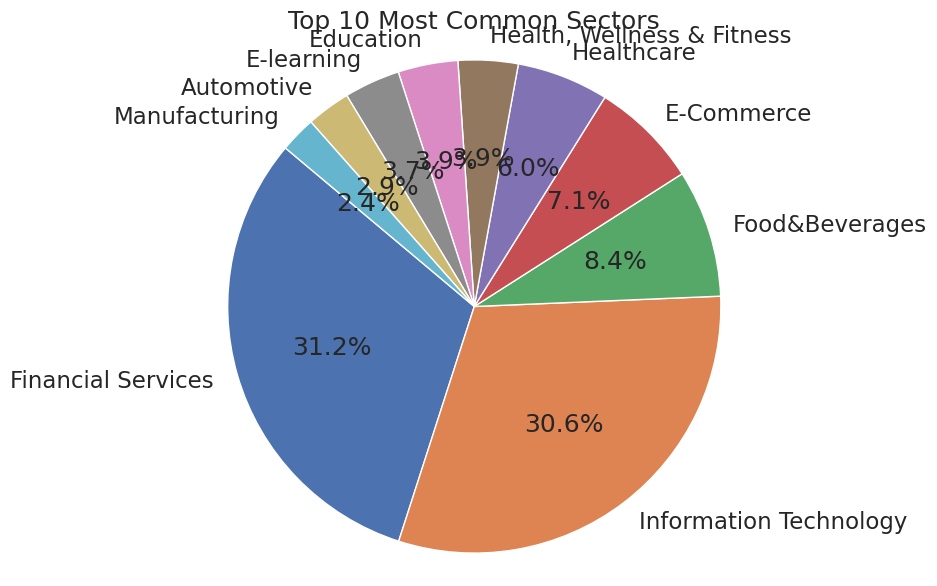

In [444]:
sector_counts = df['Sector'].value_counts().head(10)

plt.figure(figsize=(7, 7))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Most Common Sectors')

plt.show()

2. Heat map to depict represent the Stages of startups based on Location

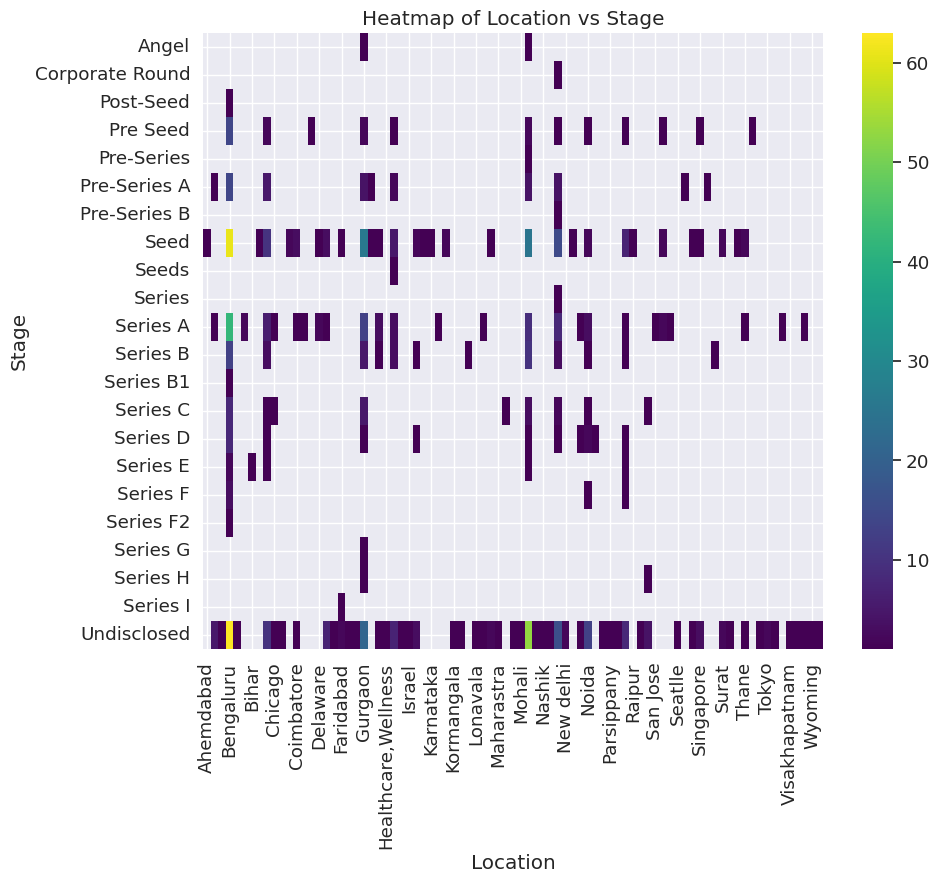

In [445]:
def heatmap(df, x_colname, y_colname, figsize=(10, 8), mpl_palette_name='viridis', font_scale=1.2):
    plt.figure(figsize=figsize)
    sns.set(font_scale=font_scale)

    df_2dhist = pd.DataFrame({
        x_label: grp[y_colname].value_counts()
        for x_label, grp in df.groupby(x_colname)
    })

    sns.heatmap(df_2dhist, cmap=mpl_palette_name)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    plt.title(f'Heatmap of {x_colname} vs {y_colname}')
    plt.show()

heatmap(df, 'Location', 'Stage', figsize=(10, 8), mpl_palette_name='viridis', font_scale=1.2)


3. Heat map to depict represent the years when the startups was found based on Location

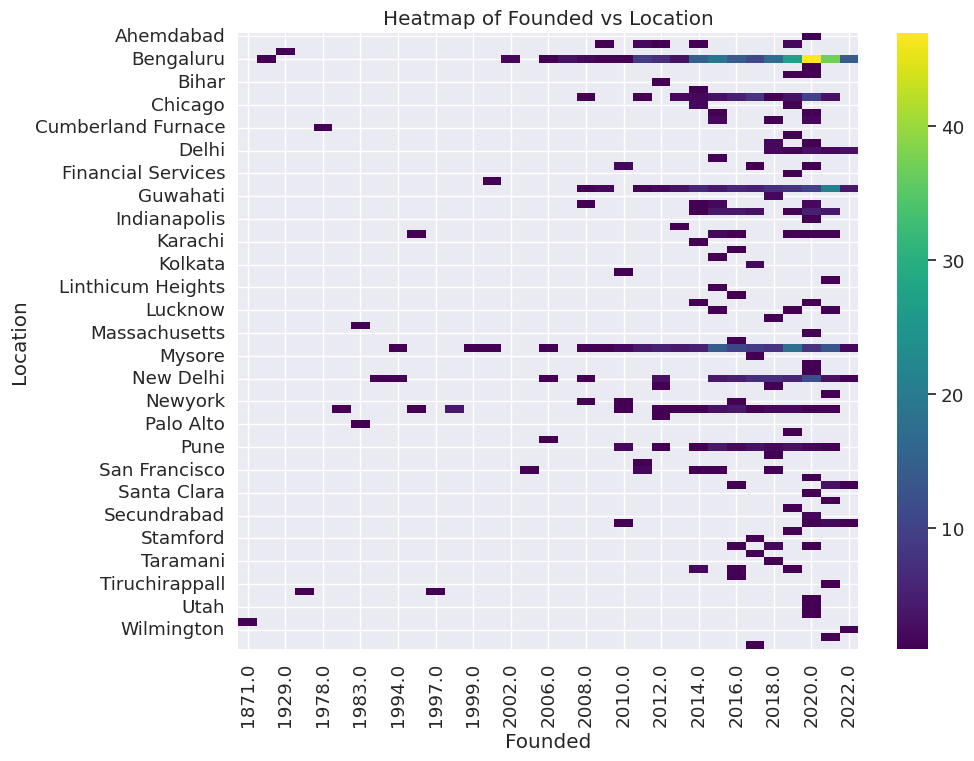

In [446]:

def heatmap(df, x_colname, y_colname, figsize=(10, 8), mpl_palette_name='viridis', font_scale=1.2):
    plt.figure(figsize=figsize)
    sns.set(font_scale=font_scale)

    df['Founded'] = pd.to_numeric(df['Founded'], errors='coerce')

    df.dropna(subset=['Founded'], inplace=True)

    df['Founded_Bins'] = pd.cut(df['Founded'], bins=10, precision=0)

    df_2dhist = pd.DataFrame({
        x_label: grp[y_colname].value_counts()
        for x_label, grp in df.groupby(x_colname)
    })

    sns.heatmap(df_2dhist, cmap=mpl_palette_name)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    plt.title(f'Heatmap of {x_colname} vs {y_colname}')
    plt.show()

heatmap(df, 'Founded', 'Location', figsize=(10, 8), mpl_palette_name='viridis', font_scale=1.2)

4. A categorical histogram to depict the various stages of funding for a startup

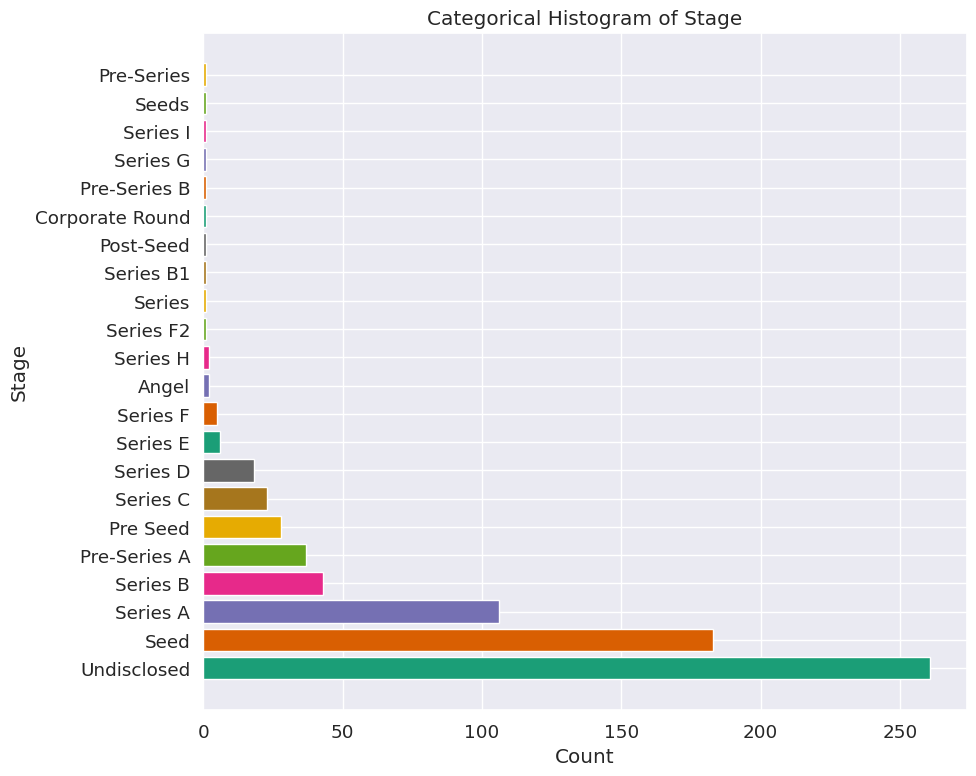

In [447]:

def categorical_histogram(df, colname, figsize=(10, 8), mpl_palette_name='Dark2', font_scale=1.2):
    plt.figure(figsize=figsize)
    sns.set(font_scale=font_scale)

    bars = df[colname].value_counts()
    plt.barh(bars.index, bars.values, color=sns.color_palette(mpl_palette_name, len(bars)))
    plt.title(f'Categorical Histogram of {colname}')
    plt.xlabel('Count')
    plt.ylabel(colname)
    plt.tight_layout()  # To avoid overlapping labels
    plt.show()


# Use the categorical_histogram function to visualize the 'Stage' column
categorical_histogram(df, 'Stage', figsize=(10, 8), mpl_palette_name='Dark2', font_scale=1.2)



5. A categorical representation of top 10 locations where startups are dominant

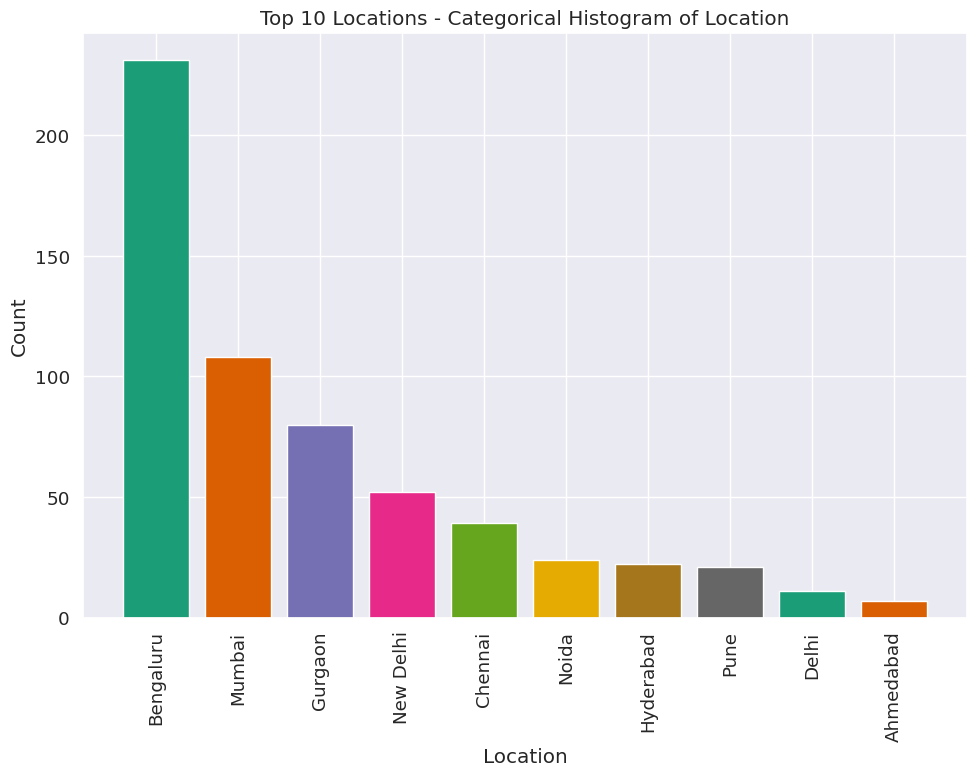

In [448]:
def categorical_histogram(df, colname, top_n=10, figsize=(10, 8), mpl_palette_name='Dark2', font_scale=1.2):
    plt.figure(figsize=figsize)
    sns.set(font_scale=font_scale)

    top_locations = df[colname].value_counts().nlargest(top_n)
    plt.bar(top_locations.index, top_locations.values, color=sns.color_palette(mpl_palette_name, len(top_locations)))
    plt.title(f'Top {top_n} Locations - Categorical Histogram of {colname}')
    plt.xlabel(colname)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # To avoid overlapping labels
    plt.show()

categorical_histogram(df, 'Location', top_n=10, figsize=(10, 8), mpl_palette_name='Dark2', font_scale=1.2)


6. A categorical representation of the number of startups that were founded in each year

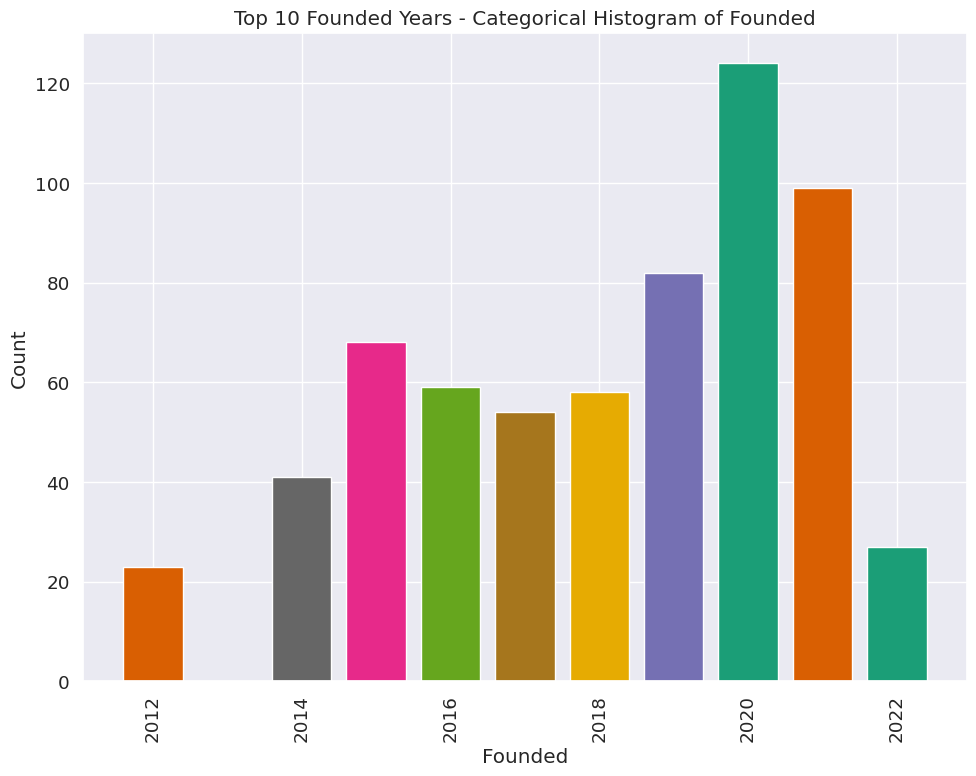

In [449]:
def categorical_histogram(df, colname, top_n=10, figsize=(10, 8), mpl_palette_name='Dark2', font_scale=1.2):
    plt.figure(figsize=figsize)
    sns.set(font_scale=font_scale)

    top_founded = df[colname].value_counts().nlargest(top_n)
    plt.bar(top_founded.index, top_founded.values, color=sns.color_palette(mpl_palette_name, len(top_founded)))
    plt.title(f'Top {top_n} Founded Years - Categorical Histogram of {colname}')
    plt.xlabel(colname)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # To avoid overlapping labels
    plt.show()

categorical_histogram(df, 'Founded', top_n=10, figsize=(10, 8), mpl_palette_name='Dark2', font_scale=1.2)


7. A graphical representation of the amount of funding done for each of the startups

In [450]:
df['Amount'] = df['Amount'].replace({'\$':'',
                                    ',':''}, regex = True)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

pio.templates.default = "plotly_dark"
fig = px.histogram(df, x="Amount", title = "Amount of funding per start-up")
fig.show()

8. An graphical representation to show the number of investments made throughout the years

In [470]:
df_post = df[(df['Founded'] >= 2000) & (df['Founded'] <= 2022)]
df_post.to_csv("startup_data_post.csv", index=False)

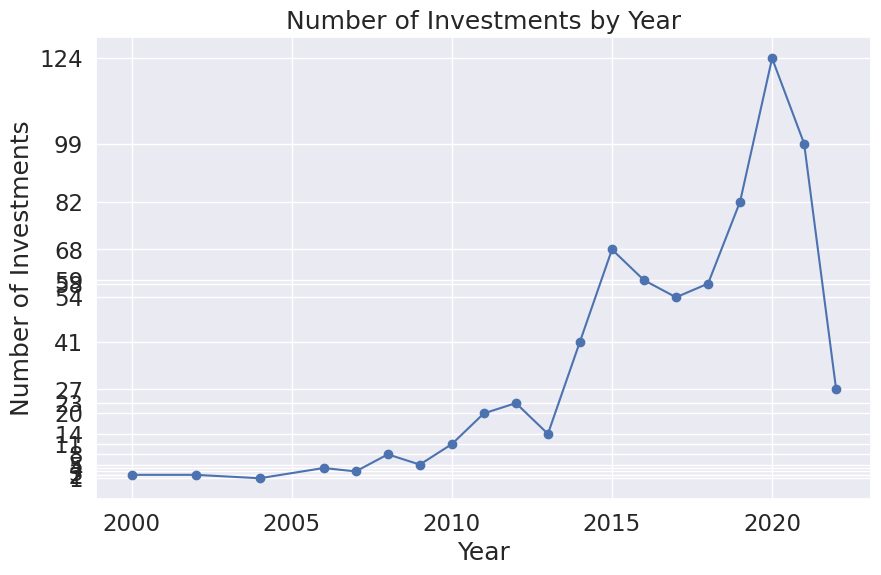

In [471]:
investment_counts_by_year = df_post['Founded'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(investment_counts_by_year.index, investment_counts_by_year.values, marker='o')
plt.title('Number of Investments by Year')
plt.xlabel('Year')
plt.ylabel('Number of Investments')

plt.yticks(investment_counts_by_year.values)

plt.show()

9. Visualising the total amount invested into startups for each year

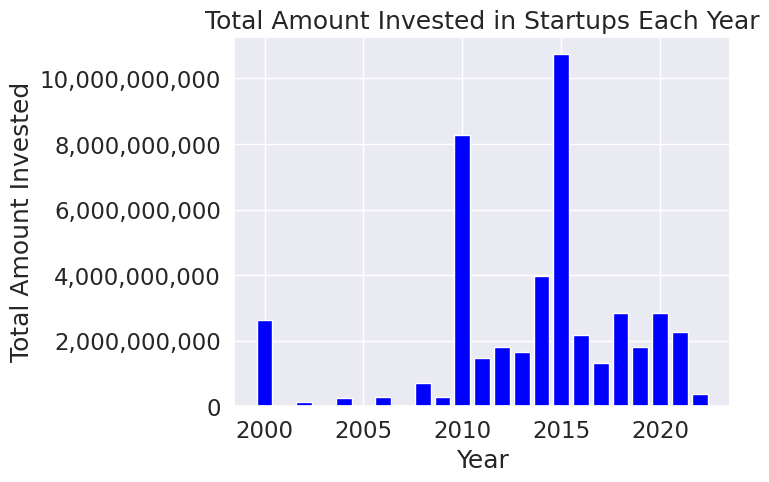

In [472]:
yearly_sum = df_post.groupby('Founded')['Amount'].sum()

plt.bar(yearly_sum.index, yearly_sum.values, color='blue')

plt.xlabel('Year')
plt.ylabel('Total Amount Invested')
plt.title('Total Amount Invested in Startups Each Year')

def currency_formatter(x, pos):
    return f"{x:,.0f}"

y_format = FuncFormatter(currency_formatter)
plt.gca().yaxis.set_major_formatter(y_format)

plt.show()

Finding startups with maximum funding or more than 200 million in funding

In [453]:
df[df.Amount > 200000000]

,Company Name,Founded,Location,Sector,What it does,Founders,Investor,Amount,Stage,Founded_Bins
10,UOLO,2020.0,Gurgaon,Information Technology,Uolo is an E-learning company that provides pr...,"Ankur Pandey, Badrish Agarwal, Pallav Pandey",Morphosis Venture Capital and Winter Capital,2.550000e+08,Series A,"(2007.0, 2022.0]"
15,Zoivane Pets,2018.0,Surat,Service industry,Zoivane Pets provides pet products as well gro...,"Kshitij Singhal, Nishma Singhal",GVFL and We Founder Circle,7.046000e+08,Seed,"(2007.0, 2022.0]"
21,WayCool Foods,2015.0,Chennai,Food&Beverages,WayCool is a developer of a tech-enabled suppl...,"Karthik Jayaraman, Sanjay Dasari",. Trifecta Capital Advisors and Trifecta Capit...,4.040000e+08,Undisclosed,"(2007.0, 2022.0]"
47,Bira 91,2015.0,New Delhi,Food&Beverages,"A refreshingly modern beer brand, Imagined in ...",Ankur Jain,The Beer Café,2.832000e+08,Series D,"(2007.0, 2022.0]"
60,Gigforce,2020.0,Bengaluru,Information Technology,Wright Research used data and artificial intel...,"Anirudh Syal, Chirag Mittal, Parag Modi",Venture Catalysts and ZNL Growth,5.075000e+08,Seed,"(2007.0, 2022.0]"
83,RevFin,2018.0,Delhi,Fintech,RevFin is a digital onboarding platform that p...,Sameer Aggarwal,Green Frontier Capital and LC Nueva Investment...,2.660000e+08,Series A,"(2007.0, 2022.0]"
89,DeHaat,2012.0,Bihar,Agriculture,DeHaat is an AgriTech startup that offers tech...,"Adarsh Srivastava, Amrendra Singh, Shashank Ku...",RTP Global and Sofina,2.386000e+08,Series E,"(2007.0, 2022.0]"
140,Razorpay,2014.0,Bengaluru,Financial Services,Razorpay is a platform that enables businesses...,"Harshil Mathur, Shashank Kumar",Posh Vine,8.163000e+08,Undisclosed,"(2007.0, 2022.0]"
141,FourKites,2014.0,Chicago,Information Technology,FourKites is a supply chain visibility platfor...,Mathew Joseph Elenjickal,Mitsui & Co and FedEx,2.415000e+08,Undisclosed,"(2007.0, 2022.0]"
149,Bizongo,2015.0,Mumbai,Packaging Services,Bizongo develops a tech-enabled B2B platform f...,"Aniket Deb, Ankit Tomar, Sachin Agrawal",Debt Financing,2.653000e+08,Undisclosed,"(2007.0, 2022.0]"


Narrowing down the startpus with more tha  200 million in funding.

Rotating the labes for better readability and overlapping

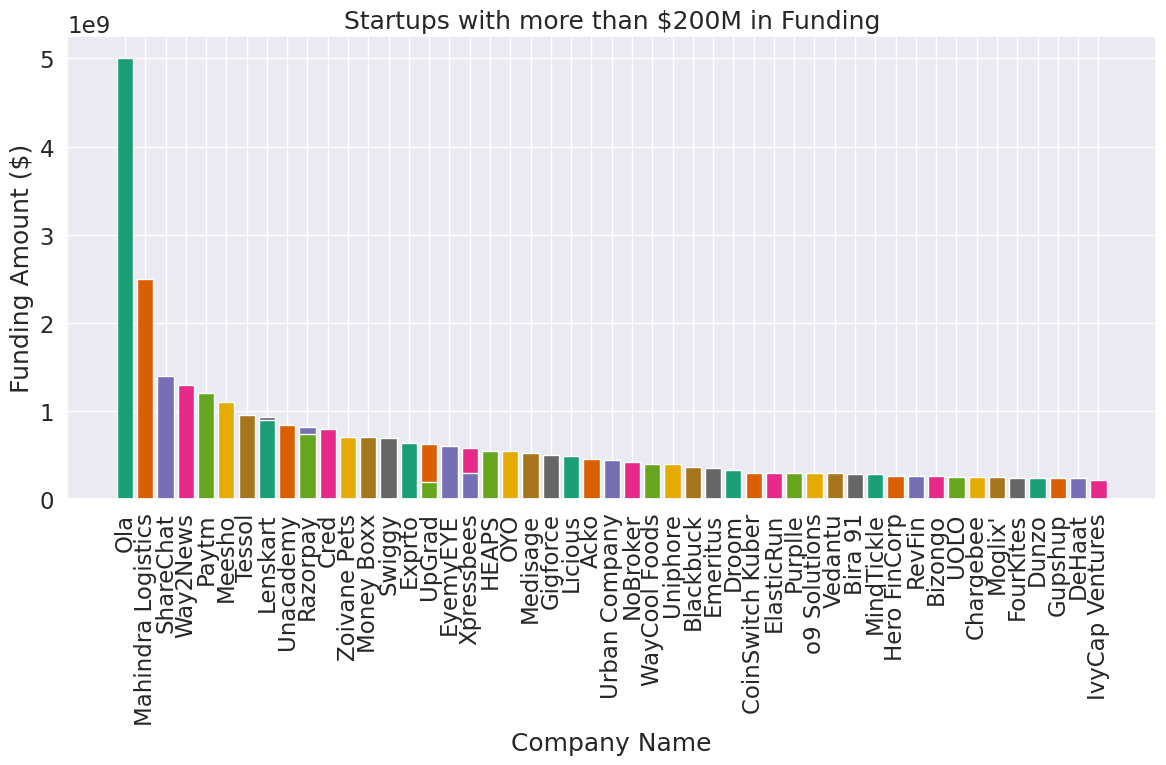

In [454]:

def visualize_funding(df, amount_threshold=200000000, figsize=(12, 8), mpl_palette_name='Dark2', font_scale=1.5):
    plt.figure(figsize=figsize)
    sns.set(font_scale=font_scale)


    top_funded_startups = df[df['Amount'] > amount_threshold].sort_values(by='Amount', ascending=False)

    plt.bar(top_funded_startups['Company Name'], top_funded_startups['Amount'],
            color=sns.color_palette(mpl_palette_name, len(top_funded_startups)))

    plt.title('Startups with more than $200M in Funding')
    plt.xlabel('Company Name')
    plt.ylabel('Funding Amount ($)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

visualize_funding(df, amount_threshold=200000000, figsize=(12, 8), mpl_palette_name='Dark2', font_scale=1.5)



#Machine Learning and Performance Analysis

In [455]:
data = pd.read_csv('all_tables_data_clean.csv')

data.fillna("", inplace=True)

label_encoder = LabelEncoder()
data['Sector'] = label_encoder.fit_transform(data['Sector'])
data['Stage'] = label_encoder.fit_transform(data['Stage'])

# Separating independent (X) and dependent (y) variables
X = data[['Stage', 'Sector']]
y = data['Amount']


In [456]:
data.shape

(731, 9)

In [457]:
# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [458]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

y_pred = y_pred_svm

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculating precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculating recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculating F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.047619047619047616
Precision: 0.0022675736961451248
Recall: 0.047619047619047616
F1 Score: 0.004329004329004328
Confusion Matrix:
[[0 0 0 ... 0 0 4]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 2]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 7]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Modeling Tree-based classifiers

In [459]:
# Decision Trees
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forests
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Extremely Randomized Trees
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_test)




Modeling Gradient Tree Boosting classifier and Neural Networks

In [460]:
# Gradient Tree Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Neural Networks (Multi-Layer Perceptron)
nn_model = MLPClassifier(hidden_layer_sizes=(150,100,50),activation = 'relu',random_state=42,max_iter=500)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

Evaluating all the models

In [461]:
def evaluate_model(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("-----------------------------")

# Evaluate each model
evaluate_model("Decision Trees", y_test, y_pred_dt)
evaluate_model("Random Forests", y_test, y_pred_rf)
evaluate_model("Extremely Randomized Trees", y_test, y_pred_et)
evaluate_model("Gradient Tree Boosting", y_test, y_pred_gb)
evaluate_model("Neural Networks", y_test, y_pred_nn)


Model: Decision Trees
Accuracy: 0.0340
Precision: 0.0195
Recall: 0.0340
F1 Score: 0.0238
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 2]]
-----------------------------
Model: Random Forests
Accuracy: 0.0340
Precision: 0.0266
Recall: 0.0340
F1 Score: 0.0254
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 3]]
-----------------------------
Model: Extremely Randomized Trees
Accuracy: 0.0340
Precision: 0.0175
Recall: 0.0340
F1 Score: 0.0220
Confusion Matrix:
[[1 0 0 ... 0 1 1]
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]]
-----------------------------
Model: Gradient Tree Boosting
Accuracy: 0.0068
Precision: 0.0041
Recall: 0.0068
F1 Score: 0.0051
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-p

#Analysis of all models

1. Models comparision for Accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-p

Text(0.5, 1.0, 'Model Comparison - Accuracy')

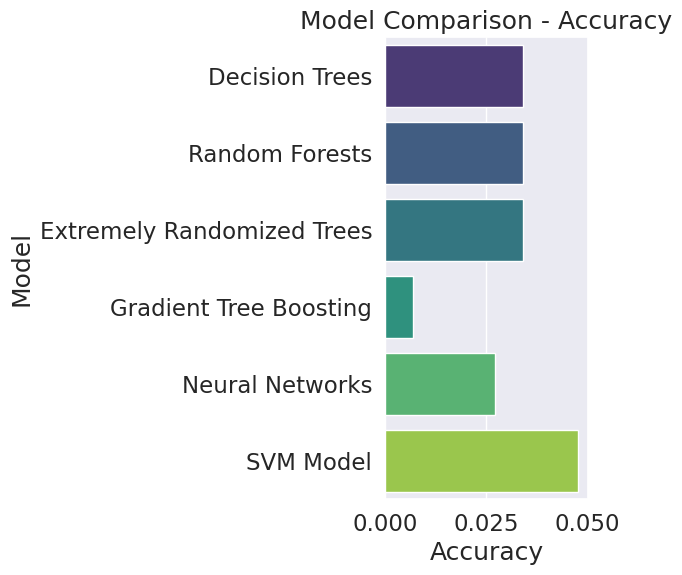

In [462]:
models = [
    ("Decision Trees", y_pred_dt),
    ("Random Forests", y_pred_rf),
    ("Extremely Randomized Trees", y_pred_et),
    ("Gradient Tree Boosting", y_pred_gb),
    ("Neural Networks", y_pred_nn),
    ("SVM Model", y_pred_svm)
]

# Lists to store evaluation metrics for each model
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Collect evaluation metrics for each model
for model_name, y_pred in models:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    model_names.append(model_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Visualize the model comparison using bar plots
plt.figure(figsize=(12, 6))

# Bar plot for Accuracy
plt.subplot(1, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=metrics_df, palette='viridis')
plt.xlabel('Accuracy')
plt.title('Model Comparison - Accuracy')


2. Models comparision for Recall

Text(0.5, 1.0, 'Model Comparison - Recall')

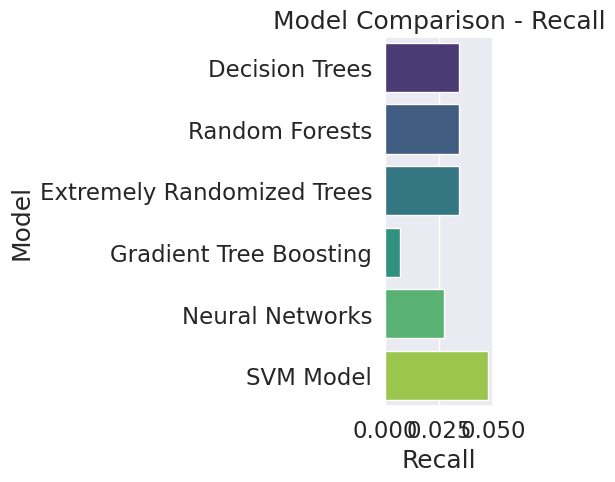

In [463]:
plt.subplot(1, 4, 3)
sns.barplot(x='Recall', y='Model', data=metrics_df, palette='viridis')
plt.xlabel('Recall')
plt.title('Model Comparison - Recall')

3. Models comparision for F1 Score

<ipython-input-464-aba56b5f96eb>:6: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



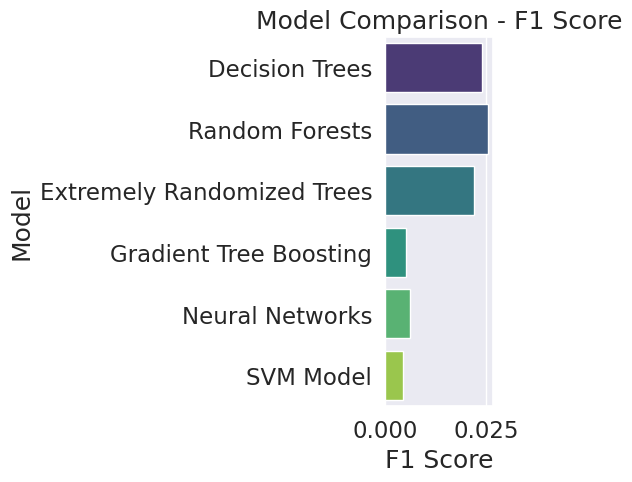

In [464]:
plt.subplot(1, 4, 4)
sns.barplot(x='F1 Score', y='Model', data=metrics_df, palette='viridis')
plt.xlabel('F1 Score')
plt.title('Model Comparison - F1 Score')

plt.tight_layout()
plt.show()

4. Models comparision for Precision

Text(0.5, 1.0, 'Model Comparison - Precision')

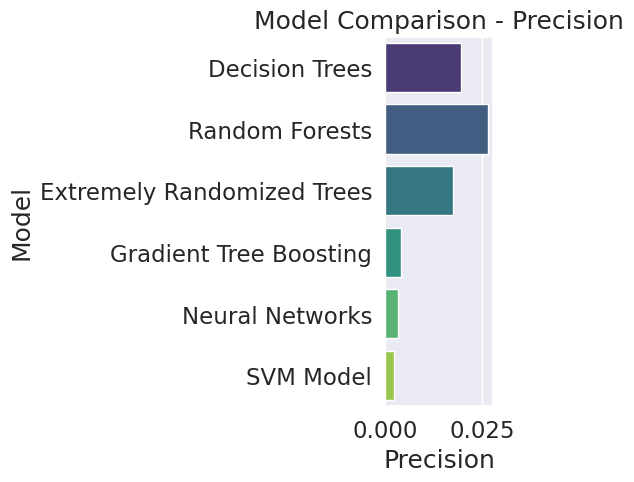

In [465]:
plt.subplot(1, 4, 2)
sns.barplot(x='Precision', y='Model', data=metrics_df, palette='viridis')
plt.xlabel('Precision')
plt.title('Model Comparison - Precision')